In [2]:
import pandas as pd 
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [3]:
def clean_data(df):
    # Infos
    print('='*50)
    print('Infos sur le dataframe')
    print(df.info())

    # Valeurs nulles 
    print('='*50)
    print('Valeurs nulles')
    print(df.isnull().sum())

    for column in df.columns:
        # histogramme avant nettoyage
        if (df[column].dtype == 'int64' or df[column].dtype == 'float64') and column != 'anomaly_if':
            print('='*50)
            print('Histogramme avant nettoyage')
            print('COLONNE : ', column)
            plt.hist(df[column], bins=100)

            plt.title(f"Box plot répartion des {column} avant nettoyage")
            plt.ylabel("{column}")

            plt.show()

        
            # Isolation Forest
            clf = IsolationForest(contamination=0.001, random_state=42)
            clf.fit(df[[column]])

            df['anomaly_if'] = clf.predict(df[[column]])
            print('='*50)
            print("Les anomalies :")
            print(df[df['anomaly_if'] == -1])

            # Supprimer les anomalies
            df = df[df['anomaly_if'] != -1]

            # histogramme après nettoyage
            print('='*50)
            print('Histogramme après nettoyage')
            plt.hist(df[column], bins=100)

            plt.title(f"Box plot répartion des {column} après nettoyage")
            plt.ylabel("{column}")

            plt.show()



# Clients

In [4]:
# Load data
df_clients = pd.read_csv('data/clients.csv', sep=';')
df_clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


Infos sur le dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None
Valeurs nulles
client_id    0
sex          0
birth        0
dtype: int64
Histogramme avant nettoyage
COLONNE :  birth


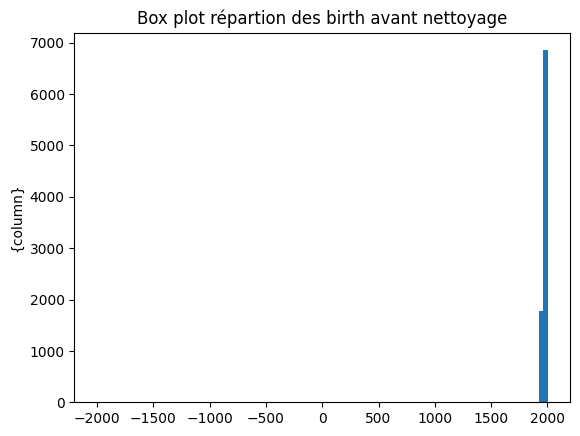

Les anomalies :
     client_id sex  birth  anomaly_if
418     c_5302   m   1929          -1
1086    c_3218   f   1930          -1
2491    c_8362   f   1929          -1
3994    c_4679   f   1930          -1
4569     c_577   m   1929          -1
5138    c_7232   f   1930          -1
7550     c_353   m   1930          -1
8494      ct_1   m  -2001          -1
Histogramme après nettoyage


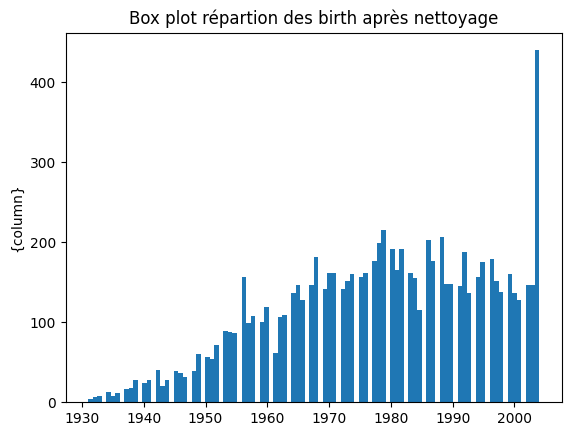

In [5]:
clean_data(df_clients)

# Produits

In [6]:
df_produits = pd.read_csv('data/produits_sous-categorie.csv', sep=',')
df_produits.head()

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81


Infos sur le dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 128.5+ KB
None
Valeurs nulles
product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64
Histogramme avant nettoyage
COLONNE :  price


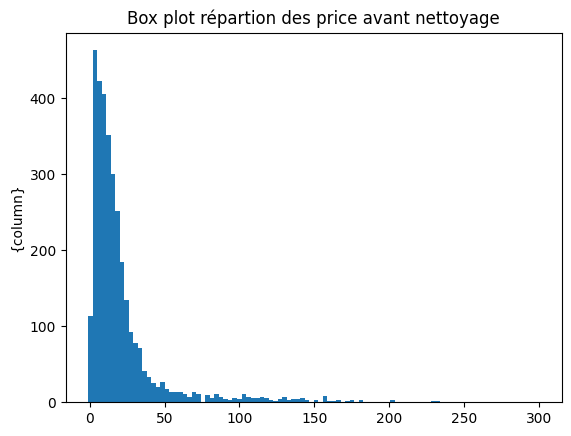

Les anomalies :
     product_id category        sub_category   price  stock_quantity  \
394       2_158  Montres  Montres connectées  247.22              68   
724        2_76  Montres  Montres connectées  254.44              25   
947         2_2  Montres  Montres connectées  300.00              79   
1436      2_167  Montres  Montres connectées  236.99              32   

      anomaly_if  
394           -1  
724           -1  
947           -1  
1436          -1  
Histogramme après nettoyage


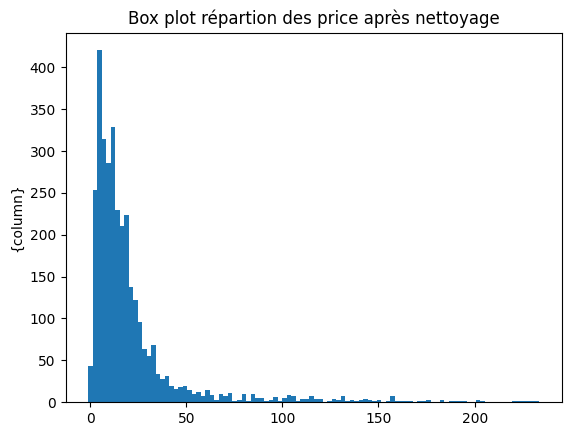

Histogramme avant nettoyage
COLONNE :  stock_quantity


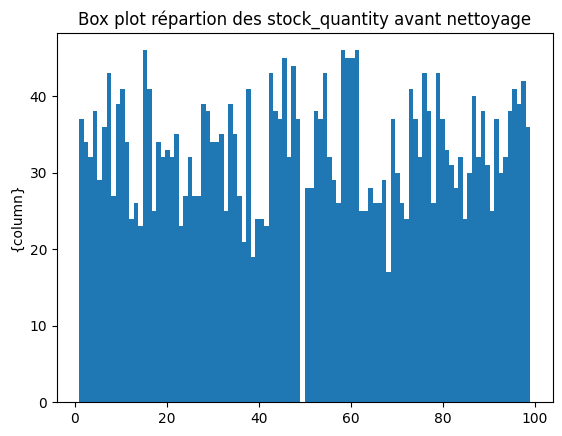

/tmp/ipykernel_43193/3173994566.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly_if'] = clf.predict(df[[column]])


Les anomalies :
Empty DataFrame
Columns: [product_id, category, sub_category, price, stock_quantity, anomaly_if]
Index: []
Histogramme après nettoyage


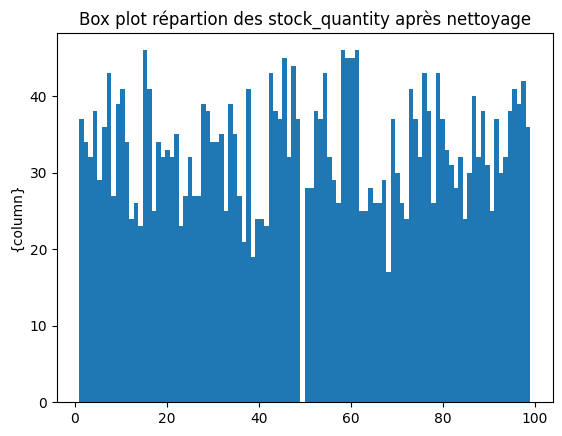

In [7]:
clean_data(df_produits)

# Ventes 

In [8]:
df_ventes = pd.read_csv('data/ventes.csv', sep=',')
df_ventes.head()

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2


Infos sur le dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_prod        337016 non-null  object
 1   date           337016 non-null  object
 2   session_id     337016 non-null  object
 3   client_id      337016 non-null  object
 4   quantity_sold  337016 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 12.9+ MB
None
Valeurs nulles
id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64
Histogramme avant nettoyage
COLONNE :  quantity_sold


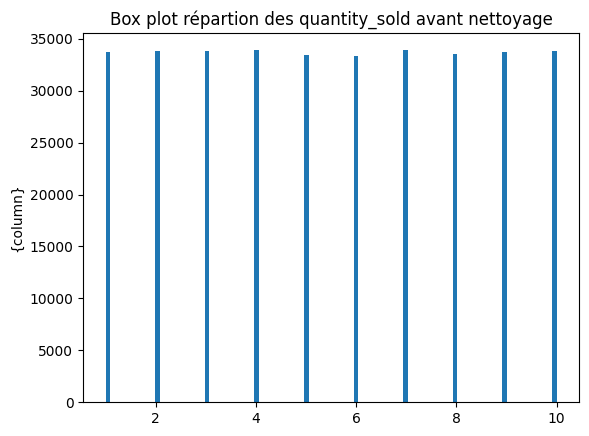

Les anomalies :
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold, anomaly_if]
Index: []
Histogramme après nettoyage


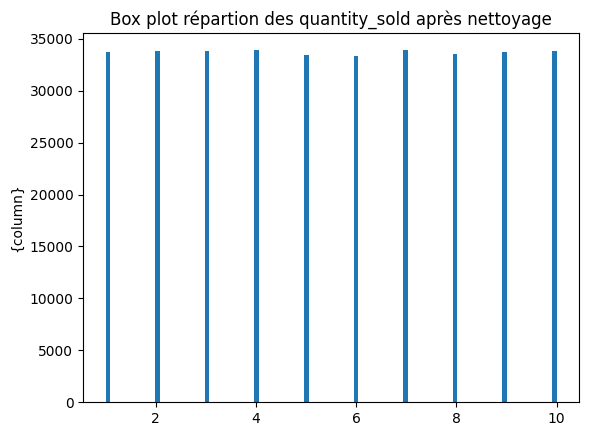

In [9]:
clean_data(df_ventes)

# Jointure 

In [13]:
df_ventes_clients = pd.merge(df_ventes, df_clients, on='client_id')
df_ventes_clients.head()

,id_prod,date,session_id,client_id,quantity_sold,anomaly_if_x,sex,birth,anomaly_if_y
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,1,f,1977,1
1,1_596,2021-09-12 02:11:24.774608,s_88567,c_4450,10,1,f,1977,1
2,1_278,2021-09-10 15:09:01.555889,s_87835,c_4450,4,1,f,1977,1
3,0_1447,2021-05-25 00:17:56.841054,s_39094,c_4450,6,1,f,1977,1
4,0_1357,2021-08-01 10:43:25.039433,s_69919,c_4450,8,1,f,1977,1


In [16]:
# Rename column product_id to id_prod
df_produits.rename(columns={'product_id': 'id_prod'}, inplace=True)
df_produits.head()

,id_prod,category,sub_category,price,stock_quantity,anomaly_if
0,0_1421,Vêtements,T-shirts,19.99,39,1
1,0_1368,Vêtements,T-shirts,5.13,76,1
2,0_731,Vêtements,T-shirts,17.99,2,1
3,1_587,Accessoires,Sacs à main,4.99,55,1
4,0_1507,Vêtements,T-shirts,3.99,81,1


In [20]:
df = pd.merge(df_ventes_clients, df_produits, on='id_prod')
df.head()

,id_prod,date,session_id,client_id,quantity_sold,anomaly_if_x,sex,birth,anomaly_if_y,category,sub_category,price,stock_quantity,anomaly_if
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,1,f,1977,1,Vêtements,T-shirts,4.99,48,1
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,4,1,f,1981,1,Vêtements,T-shirts,4.99,48,1
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,5,1,m,1985,1,Vêtements,T-shirts,4.99,48,1
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,6,1,f,1989,1,Vêtements,T-shirts,4.99,48,1
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,6,1,m,1980,1,Vêtements,T-shirts,4.99,48,1


In [21]:
df.drop(columns=['anomaly_if', 'anomaly_if_x', 'anomaly_if_y'], inplace=True)

In [22]:
df.head()

,id_prod,date,session_id,client_id,quantity_sold,sex,birth,category,sub_category,price,stock_quantity
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5,f,1977,Vêtements,T-shirts,4.99,48
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,4,f,1981,Vêtements,T-shirts,4.99,48
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,5,m,1985,Vêtements,T-shirts,4.99,48
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,6,f,1989,Vêtements,T-shirts,4.99,48
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,6,m,1980,Vêtements,T-shirts,4.99,48
